In [12]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
import os.path
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
from pandas.tseries.offsets import MonthEnd
import math

In [13]:
cm = 1 / 2.54  # inches to cm
wu = 9*cm  # width unit
hu = 6*cm  # height unit

LEAST_SIZE = 7
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=LEAST_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [14]:
in_file = os.path.join(globals()['_dh'][0], "data/svalbard_aad.csv")
fig_dir = os.path.join(globals()['_dh'][0], "fig")

In [29]:
df = pd.read_csv(in_file)
# display(df)
df["bin"] = (df["elev_min"] + df["elev_max"]) / 2
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   elev_bin        15 non-null     int64  
 1   svalbard        15 non-null     float64
 2   western_norden  15 non-null     float64
 3   elev_min        15 non-null     int64  
 4   elev_max        15 non-null     int64  
 5   bin             15 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 848.0 bytes
None


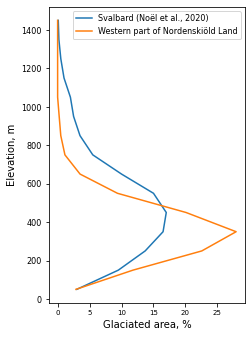

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(1*wu, 2*hu)

# ax.scatter(y=df["elev_max"], x=df["svalbard"], marker='.', linestyle='-', label="Svalbard")
ax.plot(df["svalbard"], df["bin"], label="Svalbard (Noël et al., 2020)")
ax.plot(df["western_norden"], df["bin"], label="Western part of Nordenskiöld Land")

ax.set_xlabel("Glaciated area, %")
ax.set_ylabel("Elevation, m")

ax.legend()

fig.tight_layout()

fig_paths = ("glacier_AAD.png", "glacier_AAD.pdf")
for fig_path in fig_paths:
    plt.savefig(os.path.join(fig_dir, fig_path), dpi=300, transparent=False, facecolor="white")